# **Capstone Project 1 - Inferential Statistics**
Now that we've learned the basics of inferential statistics and hypothesis testing, let's apply that to the Capstone Project



Let's do a quick recap of all the datasets associated with the capstone project by doing a preview of the data. 

In [200]:
import pandas as pd
import pylab as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [162]:
df_case_status = df = pd.read_excel('data/case-status.xls',header=1)
df_case_status.head()

,Year,Type,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending
0,2012,Initial,152431,5395,157826,3629,124055.0,38024.0,1680,0,150751
1,2013,Initial,427616,16351,443967,1697,445013.0,77747.0,470352,10975,97040
2,2014,Initial,122424,19127,141551,488,NaN,NaN,136101,20989,62374
3,2014,Renewal,116476,5760,122236,1370,NaN,NaN,22235,0,94238
4,2015,Initial,85303,7477,92780,338,NaN,NaN,90613,19070,37994


### Let's add couple of calculated columns like Accepted & Rejected Percentage

In [177]:
for lab, row in df_case_status.iterrows() :
    df_case_status["Accepted_Percentage"] = round(df_case_status["Accepted"]/df_case_status['Received']  * 100,1)
    df_case_status["Rejection_Percentage"] = round(df_case_status["Rejected"]/df_case_status['Received']  * 100,1)
df_case_status

,Year,Type,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Accepted_Percentage,Rejection_Percentage
0,2012,Initial,152431,5395,157826,3629,124055.0,38024.0,1680,0,150751,96.6,3.4
1,2013,Initial,427616,16351,443967,1697,445013.0,77747.0,470352,10975,97040,96.3,3.7
2,2014,Initial,122424,19127,141551,488,NaN,NaN,136101,20989,62374,86.5,13.5
3,2014,Renewal,116476,5760,122236,1370,NaN,NaN,22235,0,94238,95.3,4.7
4,2015,Initial,85303,7477,92780,338,NaN,NaN,90613,19070,37994,91.9,8.1
5,2015,Renewal,363553,27997,391550,1443,NaN,NaN,419394,2285,36112,92.8,7.2
6,2016,Initial,73362,1204,74566,291,NaN,NaN,52789,11398,47169,98.4,1.6
7,2016,Renewal,187339,11113,198452,744,NaN,NaN,145913,3029,74509,94.4,5.6
8,2017,Initial,45557,42,45599,194,NaN,NaN,47445,9248,36033,99.9,0.1
9,2017,Renewal,427316,43387,470703,1602,NaN,NaN,415268,3945,82612,90.8,9.2


### Accepted Percentage Trend from 2012 to 2017
After Trump became the president of United States, there was no signigicant change in the trend on how the application was accepted.

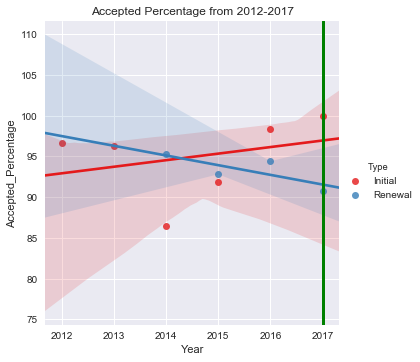

In [233]:
sns.lmplot(x='Year', y='Accepted_Percentage', data=df_case_status, hue='Type', palette='Set1')
# Display the plot
plt.title('Accepted Percentage from 2012-2017')
plt.axvline(x=2017, linewidth=3, color='green')
plt.show()

### Examine the Mean, Std, min, max and percentile for case status from 2012-2017


In [207]:
df_case_status.describe()

,Year,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Accepted_Percentage,Rejection_Percentage
count,10.00000,10.000000,10.00000,10.000000,10.000000,2.000000,2.000000,10.00000,10.000000,10.00000,10.000000,10.000000
mean,2014.90000,200137.700000,13785.30000,213923.000000,1179.600000,284534.000000,57885.500000,180179.00000,8093.900000,71883.20000,94.290000,5.710000
std,1.66333,148583.546137,13508.25036,159814.812254,1037.554946,226951.578276,28088.402669,182112.55624,7564.099953,36345.93597,3.937977,3.937977
min,2012.00000,45557.000000,42.00000,45599.000000,194.000000,124055.000000,38024.000000,1680.00000,0.000000,36033.00000,86.500000,0.100000
25%,2014.00000,93096.250000,5486.25000,100144.000000,375.500000,204294.500000,47954.750000,48781.00000,2471.000000,40287.75000,92.125000,3.475000
50%,2015.00000,137427.500000,9295.00000,149688.500000,1057.000000,284534.000000,57885.500000,113357.00000,6596.500000,68441.50000,94.850000,5.150000
75%,2016.00000,319499.500000,18433.00000,343275.500000,1562.250000,364773.500000,67816.250000,347929.25000,11292.250000,91331.50000,96.525000,7.875000
max,2017.00000,427616.000000,43387.00000,470703.000000,3629.000000,445013.000000,77747.000000,470352.00000,20989.000000,150751.00000,99.900000,13.500000


### Lets explore some of the datasets we have not yet explored.
1. DACA Recipients by Country
2. DACA Recipients by US State
3. DACA Recipients by Status
4. DACA Recipients by Age
5. DACA Recipients by Sex

### Top 4 DACA Recipients Countries (excluding Mexico) as of 2017

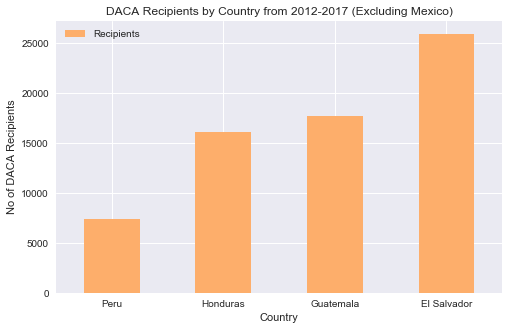

In [231]:
df_rec_country = pd.read_excel('data/daca_recipients_country.xls',header=1)
df_rec_country_top5 = df_rec_country.head(5)
sns.set()
df_rec_country_top5.sort_values(by='Recipients')[-5:4].plot(x='Country',figsize=(8,5),kind='bar',color=['#fdae6b','#a8ddb5','#9ecae1','#ece2f0','#a6bddb'])
plt.xlabel('Country')
plt.ylabel('No of DACA Recipients')
plt.title('DACA Recipients by Country from 2012-2017 (Excluding Mexico)')
plt.xticks(rotation=0)

plt.show()

### Top 4 DACA Recipients US State as of 2017

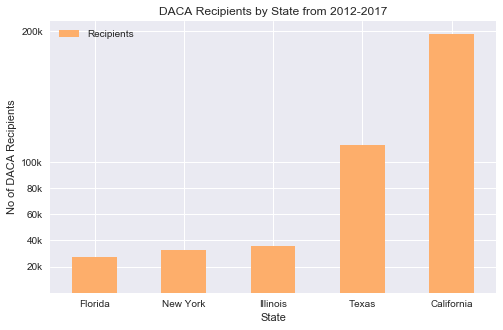

In [230]:
df_rec_state = pd.read_excel('data/daca_recipients_state.xls',header=1)
df_rec_state_top5 = df_rec_state.head(5)
sns.set()
df_rec_state_top5.sort_values(by='Recipients')[-5:].plot(x='State',kind='bar',figsize=(8,5),color=['#fdae6b','#a8ddb5','#9ecae1','#ece2f0','#a6bddb'])
plt.xlabel('State')
plt.ylabel('No of DACA Recipients')
plt.title('DACA Recipients by State from 2012-2017')
tick_val = [20000,40000,60000,80000,100000,200000]
tick_lab = ['20k','40k','60k','80k','100k','200k',]
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Sex Ratio of DACA Recipients as of 2017

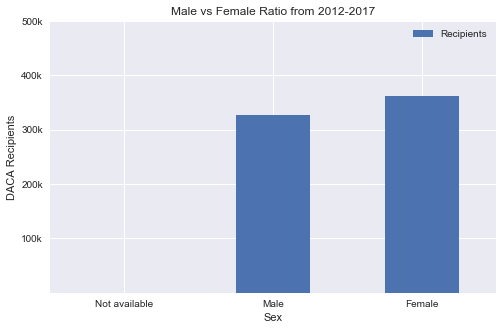

In [229]:
df_rec_sex = pd.read_excel('data/daca_sex_ratio.xls',header=1)
df_rec_sex_top5 = df_rec_sex.head(5)
sns.set()
df_rec_sex_top5.sort_values(by='Recipients')[-5:].plot(x='Sex',kind='bar',figsize=(8,5))
plt.xlabel('Sex')
plt.ylabel('DACA Recipients')
plt.title('Male vs Female Ratio from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Age range of DACA Recipients as of 2017

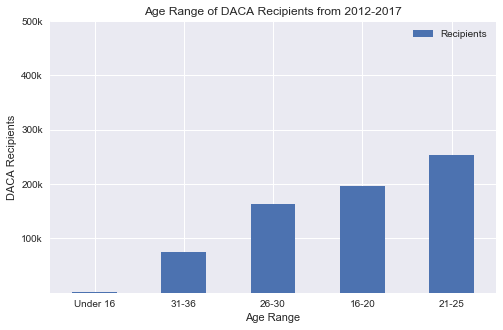

In [228]:
df_rec_age = pd.read_excel('data/daca_recipients_age.xls',header=1)
df_rec_age_top5 = df_rec_age.head(5)
sns.set()
df_rec_age_top5.sort_values(by='Recipients')[-5:].plot(x='Age',kind='bar',figsize=(8,5))
plt.xlabel('Age Range')
plt.ylabel('DACA Recipients')
plt.title('Age Range of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Maritial Status of DACA Recipients as of 2017

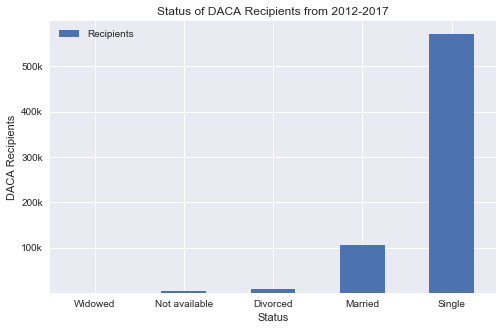

In [227]:
df_rec_status = pd.read_excel('data/daca_recipients_status.xls',header=1)
df_rec_status_top5 = df_rec_status.head(5)
sns.set()
df_rec_status_top5.sort_values(by='Recipients')[-5:].plot(x='Status',kind='bar',figsize=(8,5))
plt.xlabel('Status')
plt.ylabel('DACA Recipients')
plt.title('Status of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Calculate the number of countries benefited by DACA and their average mean

In [86]:
# Remove all null from DACA country recipients
df_rec_country_all = pd.read_excel('data/daca_recipients_country.xls',header=1)
clean_df_rec_country_all = df_rec_country_all[np.logical_not(df_rec_country_all['Recipients'].isnull())]
print('Number of countries: {}'.format(len(clean_df_rec_country_all)))
print('Mean excess DACA Recipient ratio: {:.4f}'.format(clean_df_rec_country_all['Recipients'].mean()))

Number of countries: 151
Mean excess DACA Recipient ratio: 4570.3974


### Let's divide the countries benefitted by DACA into two groups and calculate their mean
1. Less than 1000 recipients
2. More than 1000 recipients

In [96]:

df_less_1000 = clean_df_rec_country_all[(clean_df_rec_country_all['Recipients'] < 1000) & (clean_df_rec_country_all['Recipients'] > 0)]
print('Number of countries with < 1000 DACA Recipients: {}'.format(len(df_less_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_less_1000['Recipients'].mean()))


df_great_1000 = clean_df_rec_country_all[clean_df_rec_country_all['Recipients'] > 10000]
print('\nNumber of countries with > 1000 DACA Recipients: {}'.format(len(df_great_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_great_1000['Recipients'].mean()))


Number of countries with < 1000 DACA Recipients: 126
Mean excess Recipients rate: 141.984

Number of countries with > 1000 DACA Recipients: 4
Mean excess Recipients rate: 151925.000


### Compute and report the observed significance value (or p-value).

In [99]:
import statsmodels.stats.api as sms
from pandas.core import datetools
two_sample = st.ttest_ind(df_less_1000['Recipients'], 
                          df_great_1000['Recipients'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_1000['Recipients']), 
                      sms.DescrStatsW(df_great_1000['Recipients']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (-923030.943, 619464.912).
The t-statistic is -7.392 and the p-value is 0.00000000.


### Plot a histogram for group less than 1000 recipients.

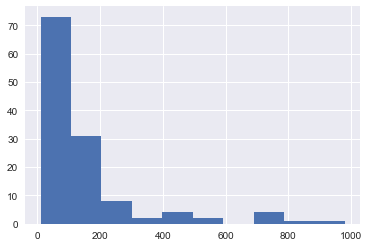

In [101]:
plt.hist(df_less_1000['Recipients'])
plt.show()

In [ ]:
In the above figure, we clearly notice that the distribution is not a normal one.

### Calculate the ECDF and plot them in a graph

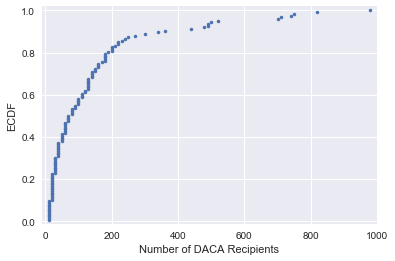

In [235]:
import numpy as np
x= np.sort(df_less_1000['Recipients'])
y = np.arange(1,len(x) + 1)/len(x)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Number of DACA Recipients')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

### Calculate the median for the two groups (Less than 1000 and greater than 1000)

In [110]:
print('The number of countries which has more than 1000 recipients',len(df_great_1000))
print('The median of these countries is',np.median(df_great_1000['Recipients']))

print('The number of countries which has less than 1000 recipients',len(df_less_1000))
print('The median of these countries is',np.median(df_less_1000['Recipients']))


The number of countries which has more than 1000 recipients 4
The median of these countries is 21800.0
The number of countries which has less than 1000 recipients 126
The median of these countries is 75.0


### Calculate the percentile for both groups

In [113]:
print('The percentile for countries having less than 1000 DACA Recipients ',np.percentile(df_less_1000['Recipients'],[25,50,75]))
print('The percentile for countries having greater than 1000 DACA Recipients ',np.percentile(df_great_1000['Recipients'],[25,50,75]))

The percentile for countries having less than 1000 DACA Recipients  [  30.    75.   167.5]
The percentile for countries having greater than 1000 DACA Recipients  [  17300.   21800.  156425.]


### Calculate the variance

In [195]:
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_less_1000)))
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_great_1000)))

The variance for countries less than 1000 DACA recipients Recipients    183.532445
dtype: float64
The variance for countries less than 1000 DACA recipients Recipients    228704.223562
dtype: float64


In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

### Calculate the Linear Regression for Overall Case Status

slope = 0.833442191457 Approved per percent Accepted
intercept = 63754.2193854 children per woman


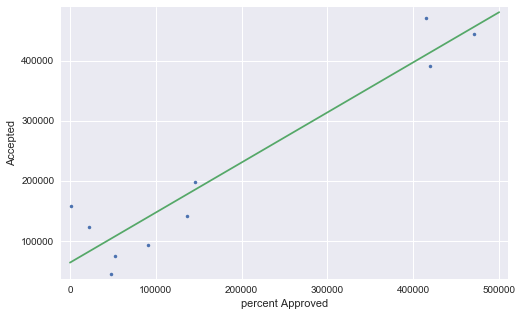

In [222]:
##### Plot the Linear Regression
fig, ax = plt.subplots(figsize=(8,5))
_ = plt.plot(df_case_status['Approved'], df_case_status['Received'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent Approved')
_ = plt.ylabel('Accepted')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df_case_status['Approved'], df_case_status['Received'], 1)

# Print the results to the screen
print('slope =', a, 'Approved per percent Accepted')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 500000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


Text(0.5,1,'Relationship between Received Application and Accepted Application')

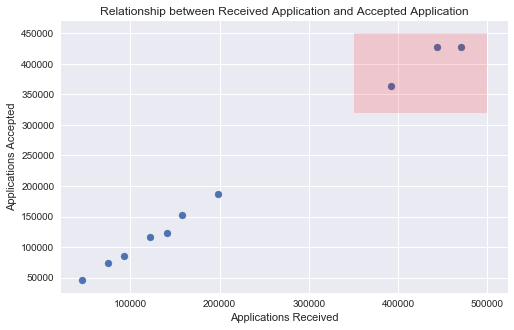

In [221]:
df_case_status
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(df_case_status.Received, df_case_status.Accepted)
ax.fill_between([350000,500000], 320000, 450000, facecolor='red', alpha = .15, interpolate=True)
plt.xlabel("Applications Received")
plt.ylabel("Applications Accepted")
plt.title("Relationship between Received Application and Accepted Application")

We observe a positive linear relationship between the number of applications received and number of the applications accepted. We also see few outliers in the range of 400k. 